1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


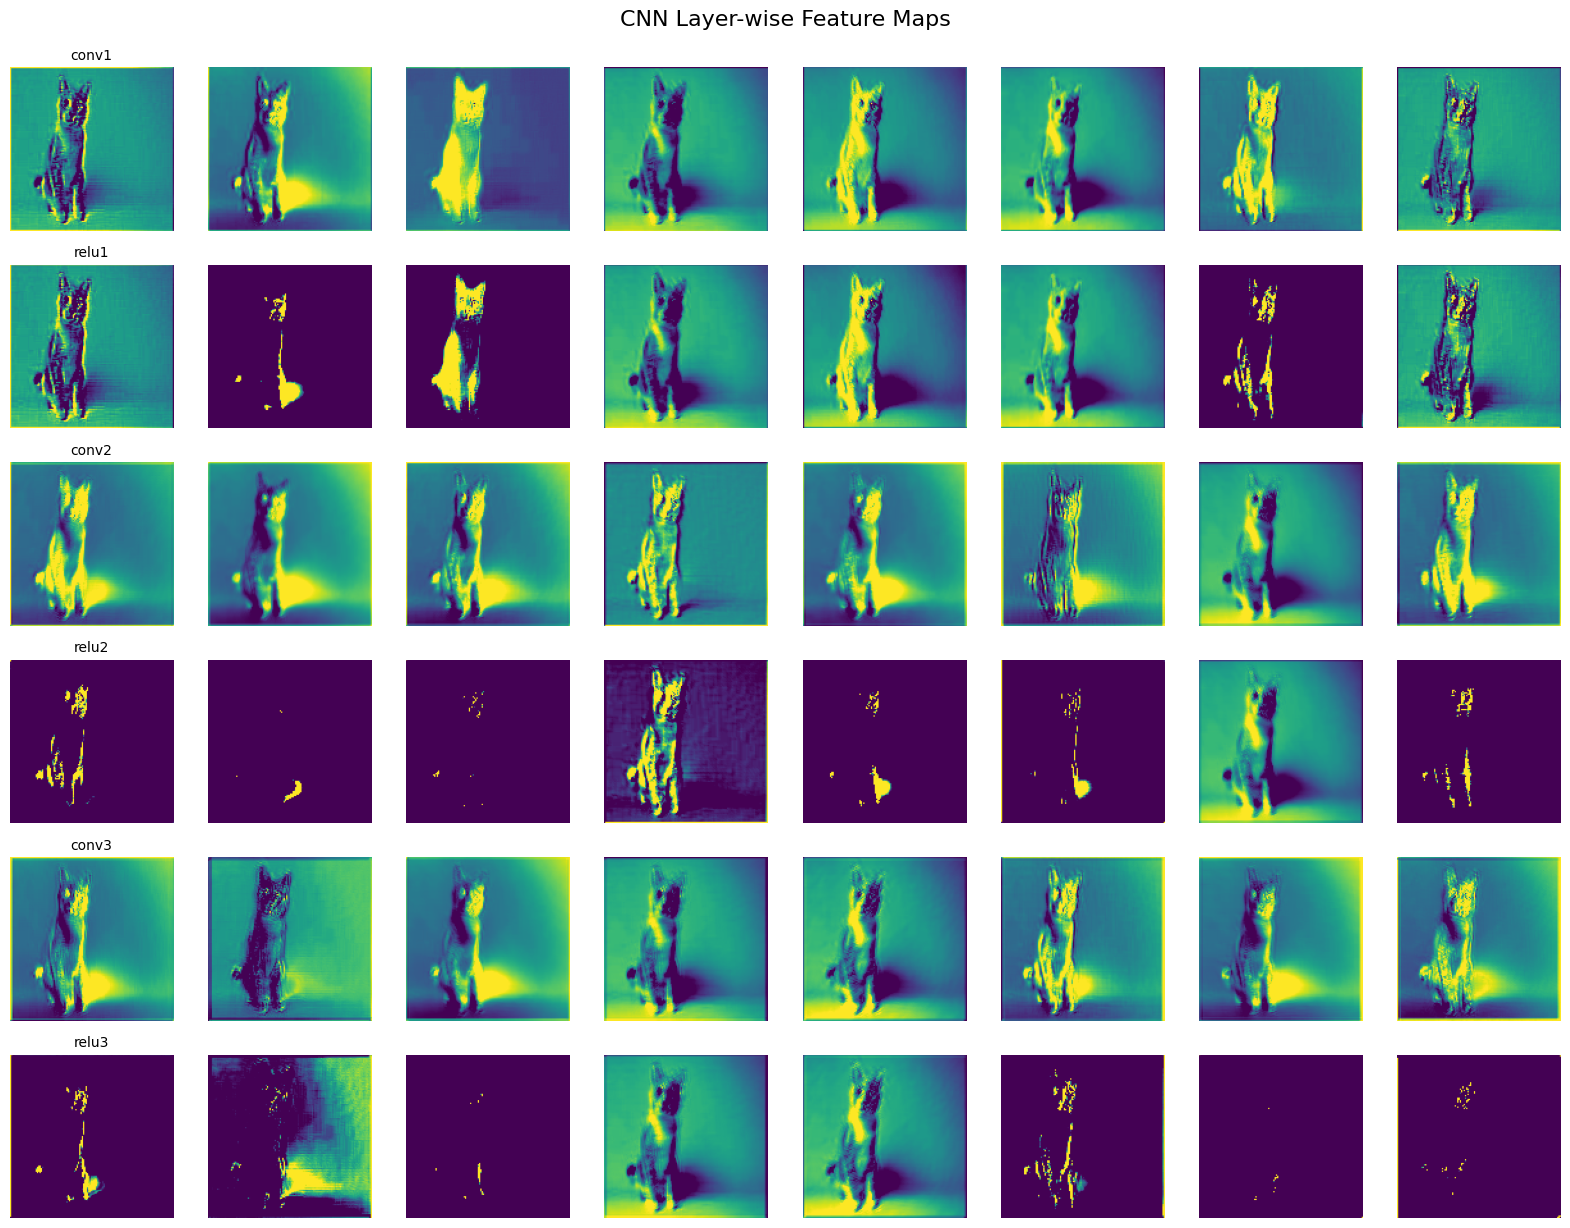

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

# ---------------------
# 1. Load and preprocess image
# ---------------------

# Replace this with your image path
image_path = 'cat.jpg'

img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Normalization for better visualization

# ---------------------
# 2. Define a simple CNN model
# ---------------------

input_layer = Input(shape=(128, 128, 3))

x = Conv2D(8, (3, 3), padding='same', name='conv1')(input_layer)
x = ReLU(name='relu1')(x)

x = Conv2D(16, (3, 3), padding='same', name='conv2')(x)
x = ReLU(name='relu2')(x)

x = Conv2D(32, (3, 3), padding='same', name='conv3')(x)
x = ReLU(name='relu3')(x)

model = Model(inputs=input_layer, outputs=x)

# ---------------------
# 3. Create model to fetch all layers' outputs
# ---------------------

layer_outputs = [layer.output for layer in model.layers[1:]]  # skip input layer
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# ---------------------
# 4. Forward pass through the model
# ---------------------

activations = activation_model.predict(img_array)

# ---------------------
# 5. Plot all activations in one big figure
# ---------------------

def display_all_layers(activations, col_limit=8):
    layer_titles = [layer.name for layer in model.layers[1:]]

    plt.figure(figsize=(col_limit * 2, len(activations) * 2))

    for layer_index, activation in enumerate(activations):
        num_filters = min(col_limit, activation.shape[-1])
        for i in range(num_filters):
            ax = plt.subplot(len(activations), col_limit, layer_index * col_limit + i + 1)
            feature_map = activation[0, :, :, i]

            # Normalize for visualization
            feature_map -= feature_map.mean()
            feature_map /= (feature_map.std() + 1e-5)
            feature_map *= 64
            feature_map += 128
            feature_map = np.clip(feature_map, 0, 255).astype('uint8')

            plt.imshow(feature_map, cmap='viridis')
            plt.axis('off')
            if i == 0:
                ax.set_title(layer_titles[layer_index], fontsize=10)

    plt.tight_layout()
    plt.suptitle("CNN Layer-wise Feature Maps", fontsize=16, y=1.02)
    plt.show()

display_all_layers(activations)
